Dimensões da imagem original: (329, 329, 3)


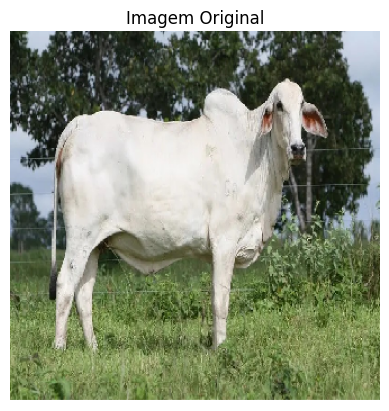

Formato da matriz de pixels: (108241, 3)
Cores dominantes (RGB): [[ 49  59  38]
 [215 215 213]
 [120 134  92]]


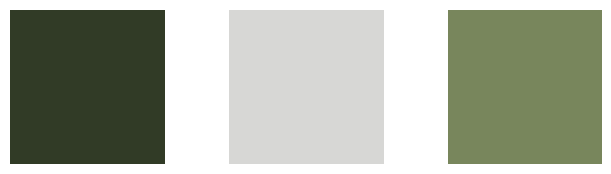

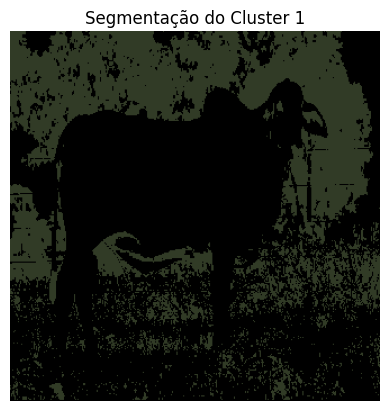

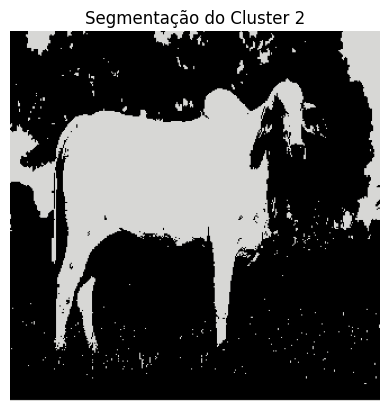

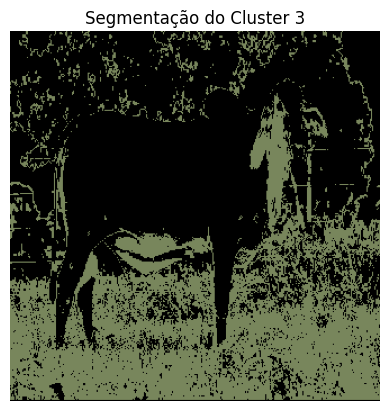

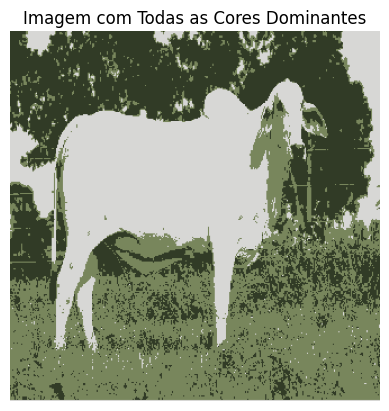

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.cluster import KMeans

# Carregar a imagem
im = cv2.imread("/content/drive/MyDrive/imagens-bobas/samuel 2.png")
#im = cv2.imread("/content/images.jpg")  # Lê a imagem em formato BGR

im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)  # Converte para RGB
original_shape = im.shape
print("Dimensões da imagem original:", original_shape)

# Exibir a imagem original
plt.imshow(im)
plt.title("Imagem Original")
plt.axis('off')
plt.show()

# Transformar a imagem em vetor de pixels (flatten)
all_pixels = im.reshape((-1, 3))
print("Formato da matriz de pixels:", all_pixels.shape)

# Número de cores dominantes
dominant_colors = 3

# Aplicar K-Means
km = KMeans(n_clusters=dominant_colors, n_init=10, random_state=42)
km.fit(all_pixels)

# Obter os centros dos clusters (cores dominantes)
centers = np.array(km.cluster_centers_, dtype='uint8')
print("Cores dominantes (RGB):", centers)

# Exibir cores dominantes
plt.figure(figsize=(8, 2))
for i, each_col in enumerate(centers):
    plt.subplot(1, dominant_colors, i + 1)
    plt.axis("off")
    color_swatch = np.zeros((100, 100, 3), dtype='uint8')
    color_swatch[:, :, :] = each_col
    plt.imshow(color_swatch)

plt.show()

# Inicializar a imagem para mostrar todas as cores dominantes
combined_img = np.zeros_like(im)

# Exibir as segmentações por cluster e construir a imagem com todas as cores dominantes
for i in range(dominant_colors):
    # Criar uma máscara para o cluster escolhido
    mask = (km.labels_ == i)

    # Criar uma nova imagem onde apenas os pixels pertencentes ao cluster escolhido são mantidos
    segmented_img = np.zeros_like(im)
    segmented_img[mask.reshape(im.shape[0], im.shape[1])] = centers[i]

    # Exibir a imagem segmentada para o cluster i
    plt.imshow(segmented_img)
    plt.title(f"Segmentação do Cluster {i + 1}")
    plt.axis('off')
    plt.show()

    # Adicionar a segmentação ao 'combined_img' para mostrar todas as cores dominantes
    combined_img[mask.reshape(im.shape[0], im.shape[1])] = centers[i]

# Exibir a imagem com todas as cores dominantes
plt.imshow(combined_img)
plt.title("Imagem com Todas as Cores Dominantes")
plt.axis('off')
plt.show()